# **About the Dataset**
### The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

- **CRIM**: per capita crime rate by town
- **ZN**: proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS**: proportion of non-retail business acres per town
- **CHAS**: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- **NOX**: nitric oxides concentration (parts per 10 million)
- **RM**: average number of rooms per dwelling
- **AGE**: proportion of owner-occupied units built prior to 1940
- **DIS**: weighted distances to five Boston employment centres
- **RAD**: index of accessibility to radial highways
- **TAX**: full-value property-tax rate per $10,000

- **PTRATIO**: pupil-teacher ratio by town
- **B**: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- **LSTAT**: % lower status of the population
- **MEDV**: Median value of owner-occupied homes in $1000's

In [17]:
#!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.1 MB/s eta 0:00:00


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('HousingData.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


## **EDA**

In [3]:
df.shape

(506, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
df.isna().sum()

,0
CRIM,20
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0
TAX,0


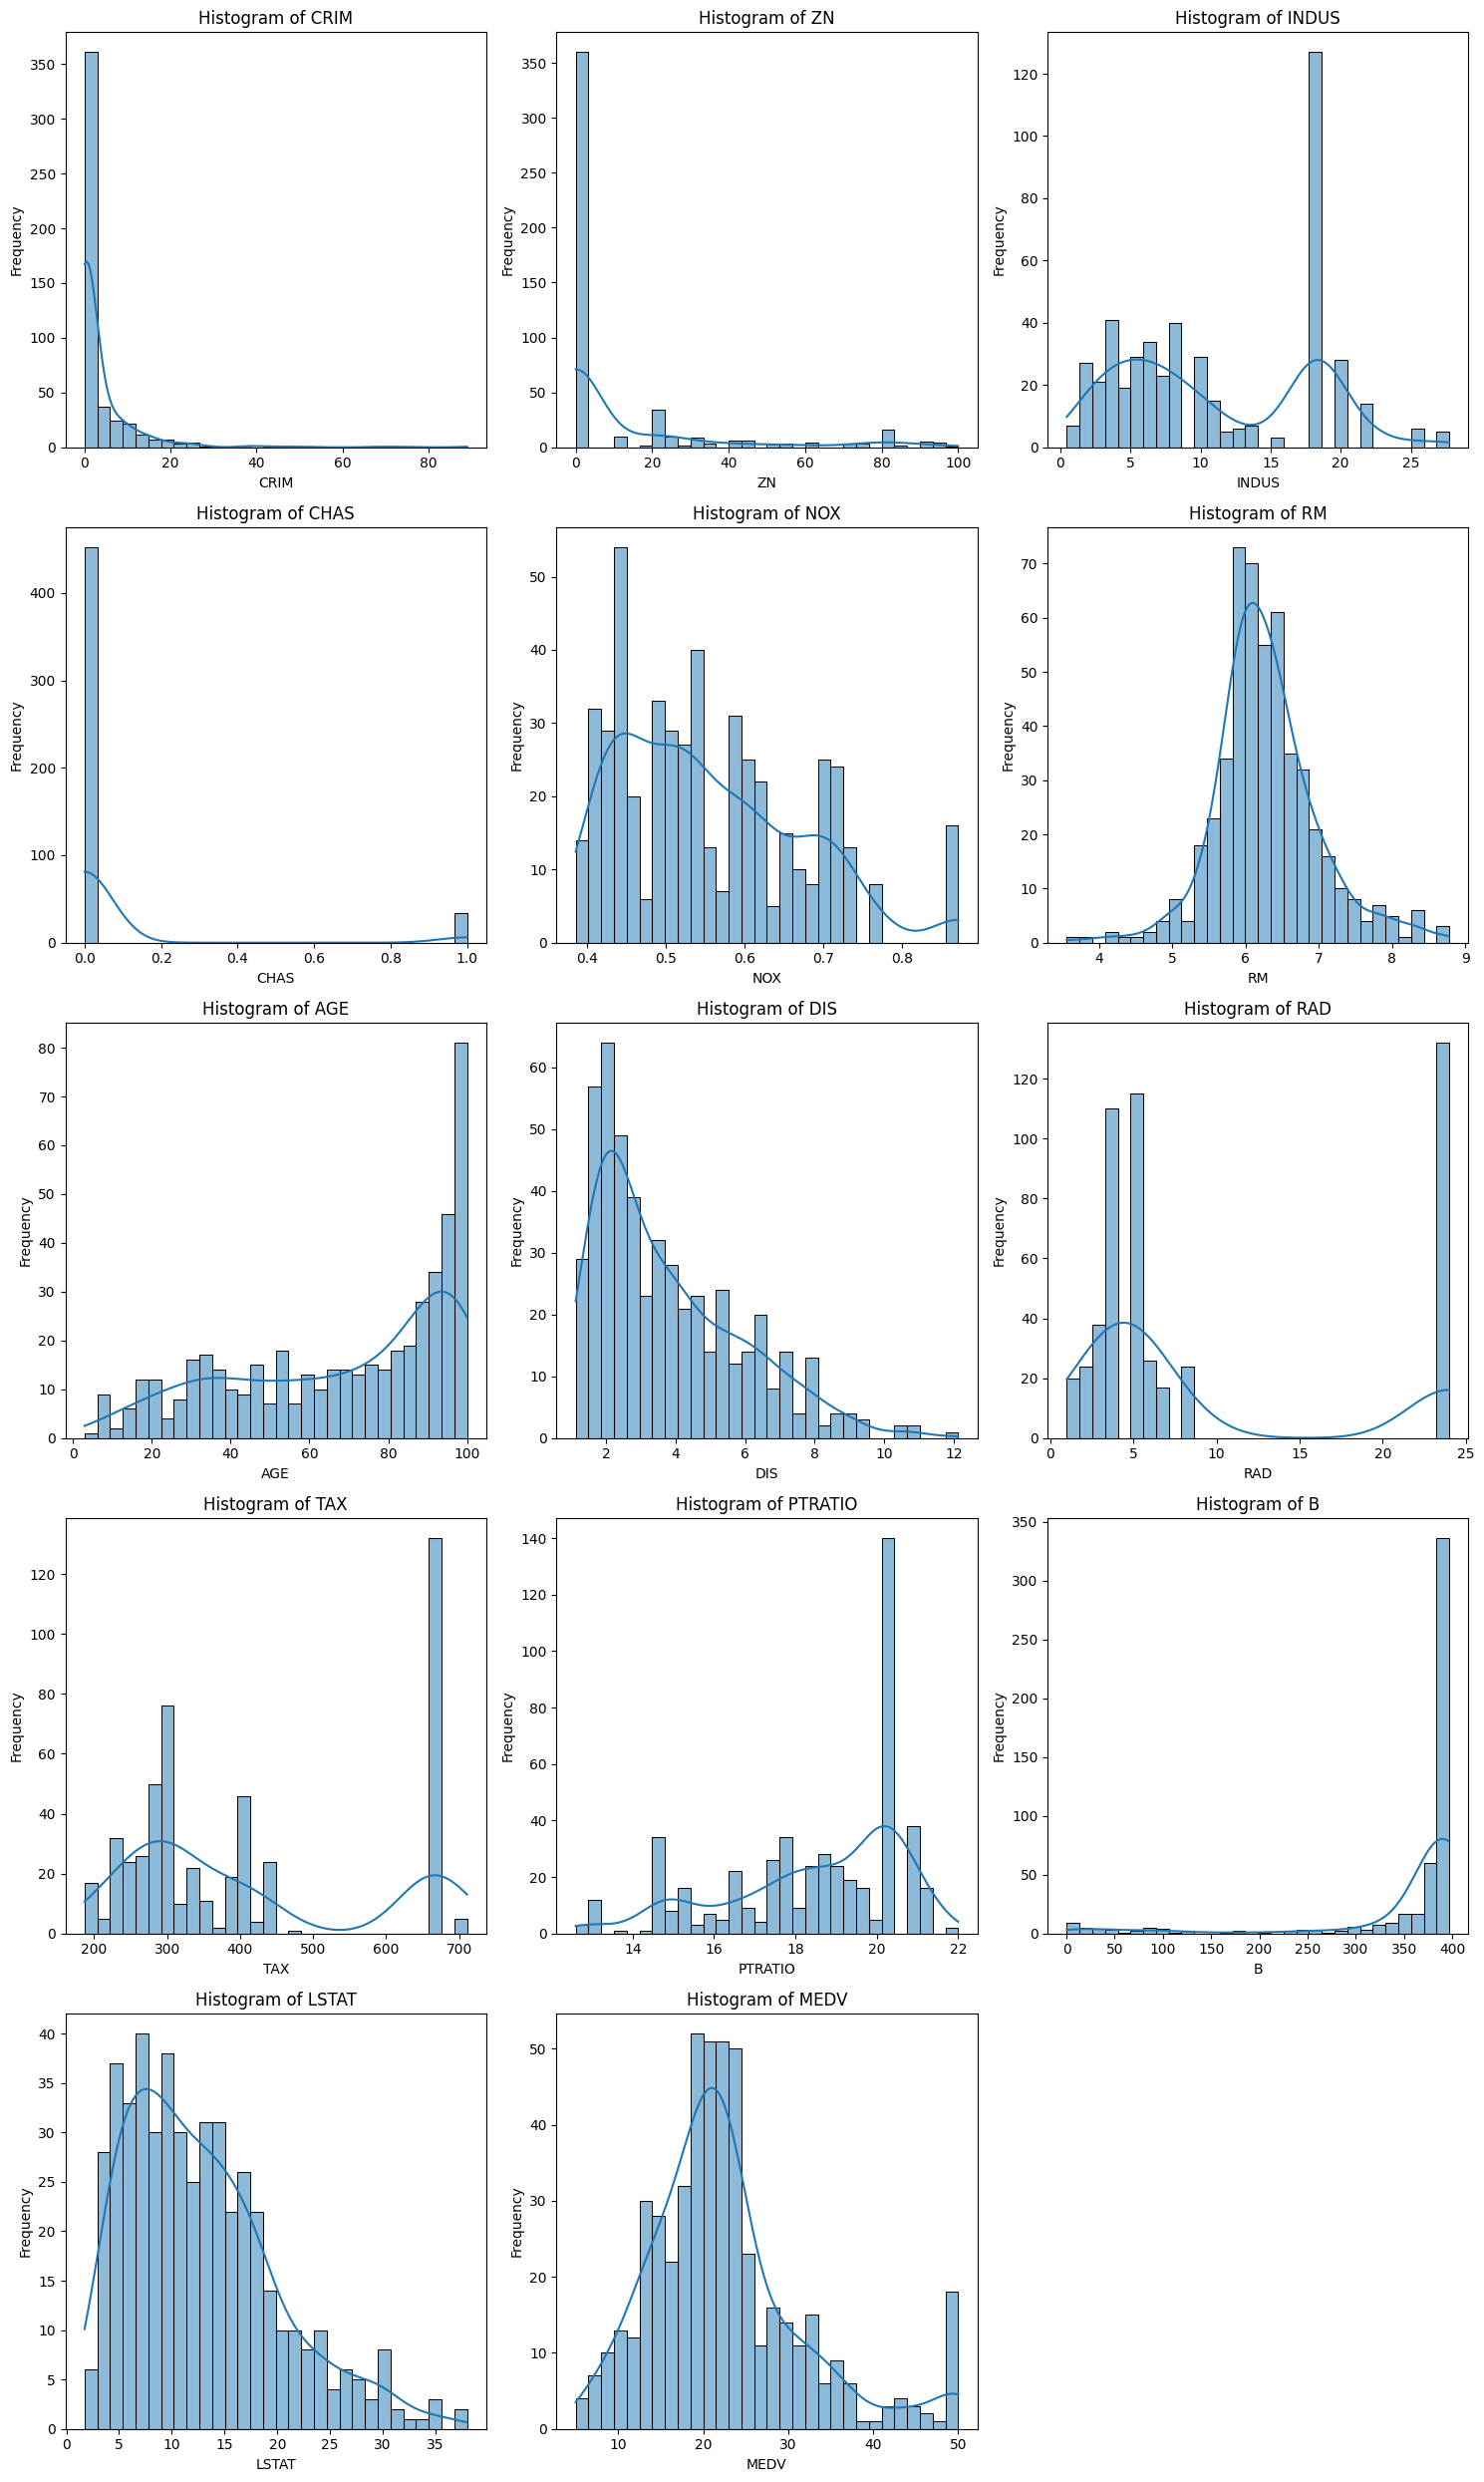

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already defined

# Get all numerical columns
numerical_columns = df.select_dtypes(include='number').columns

# Set up the number of plots per row
n_cols = 3
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols  # Calculate rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms for all numerical columns
for i, column in enumerate(numerical_columns):
    sns.histplot(df[column], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

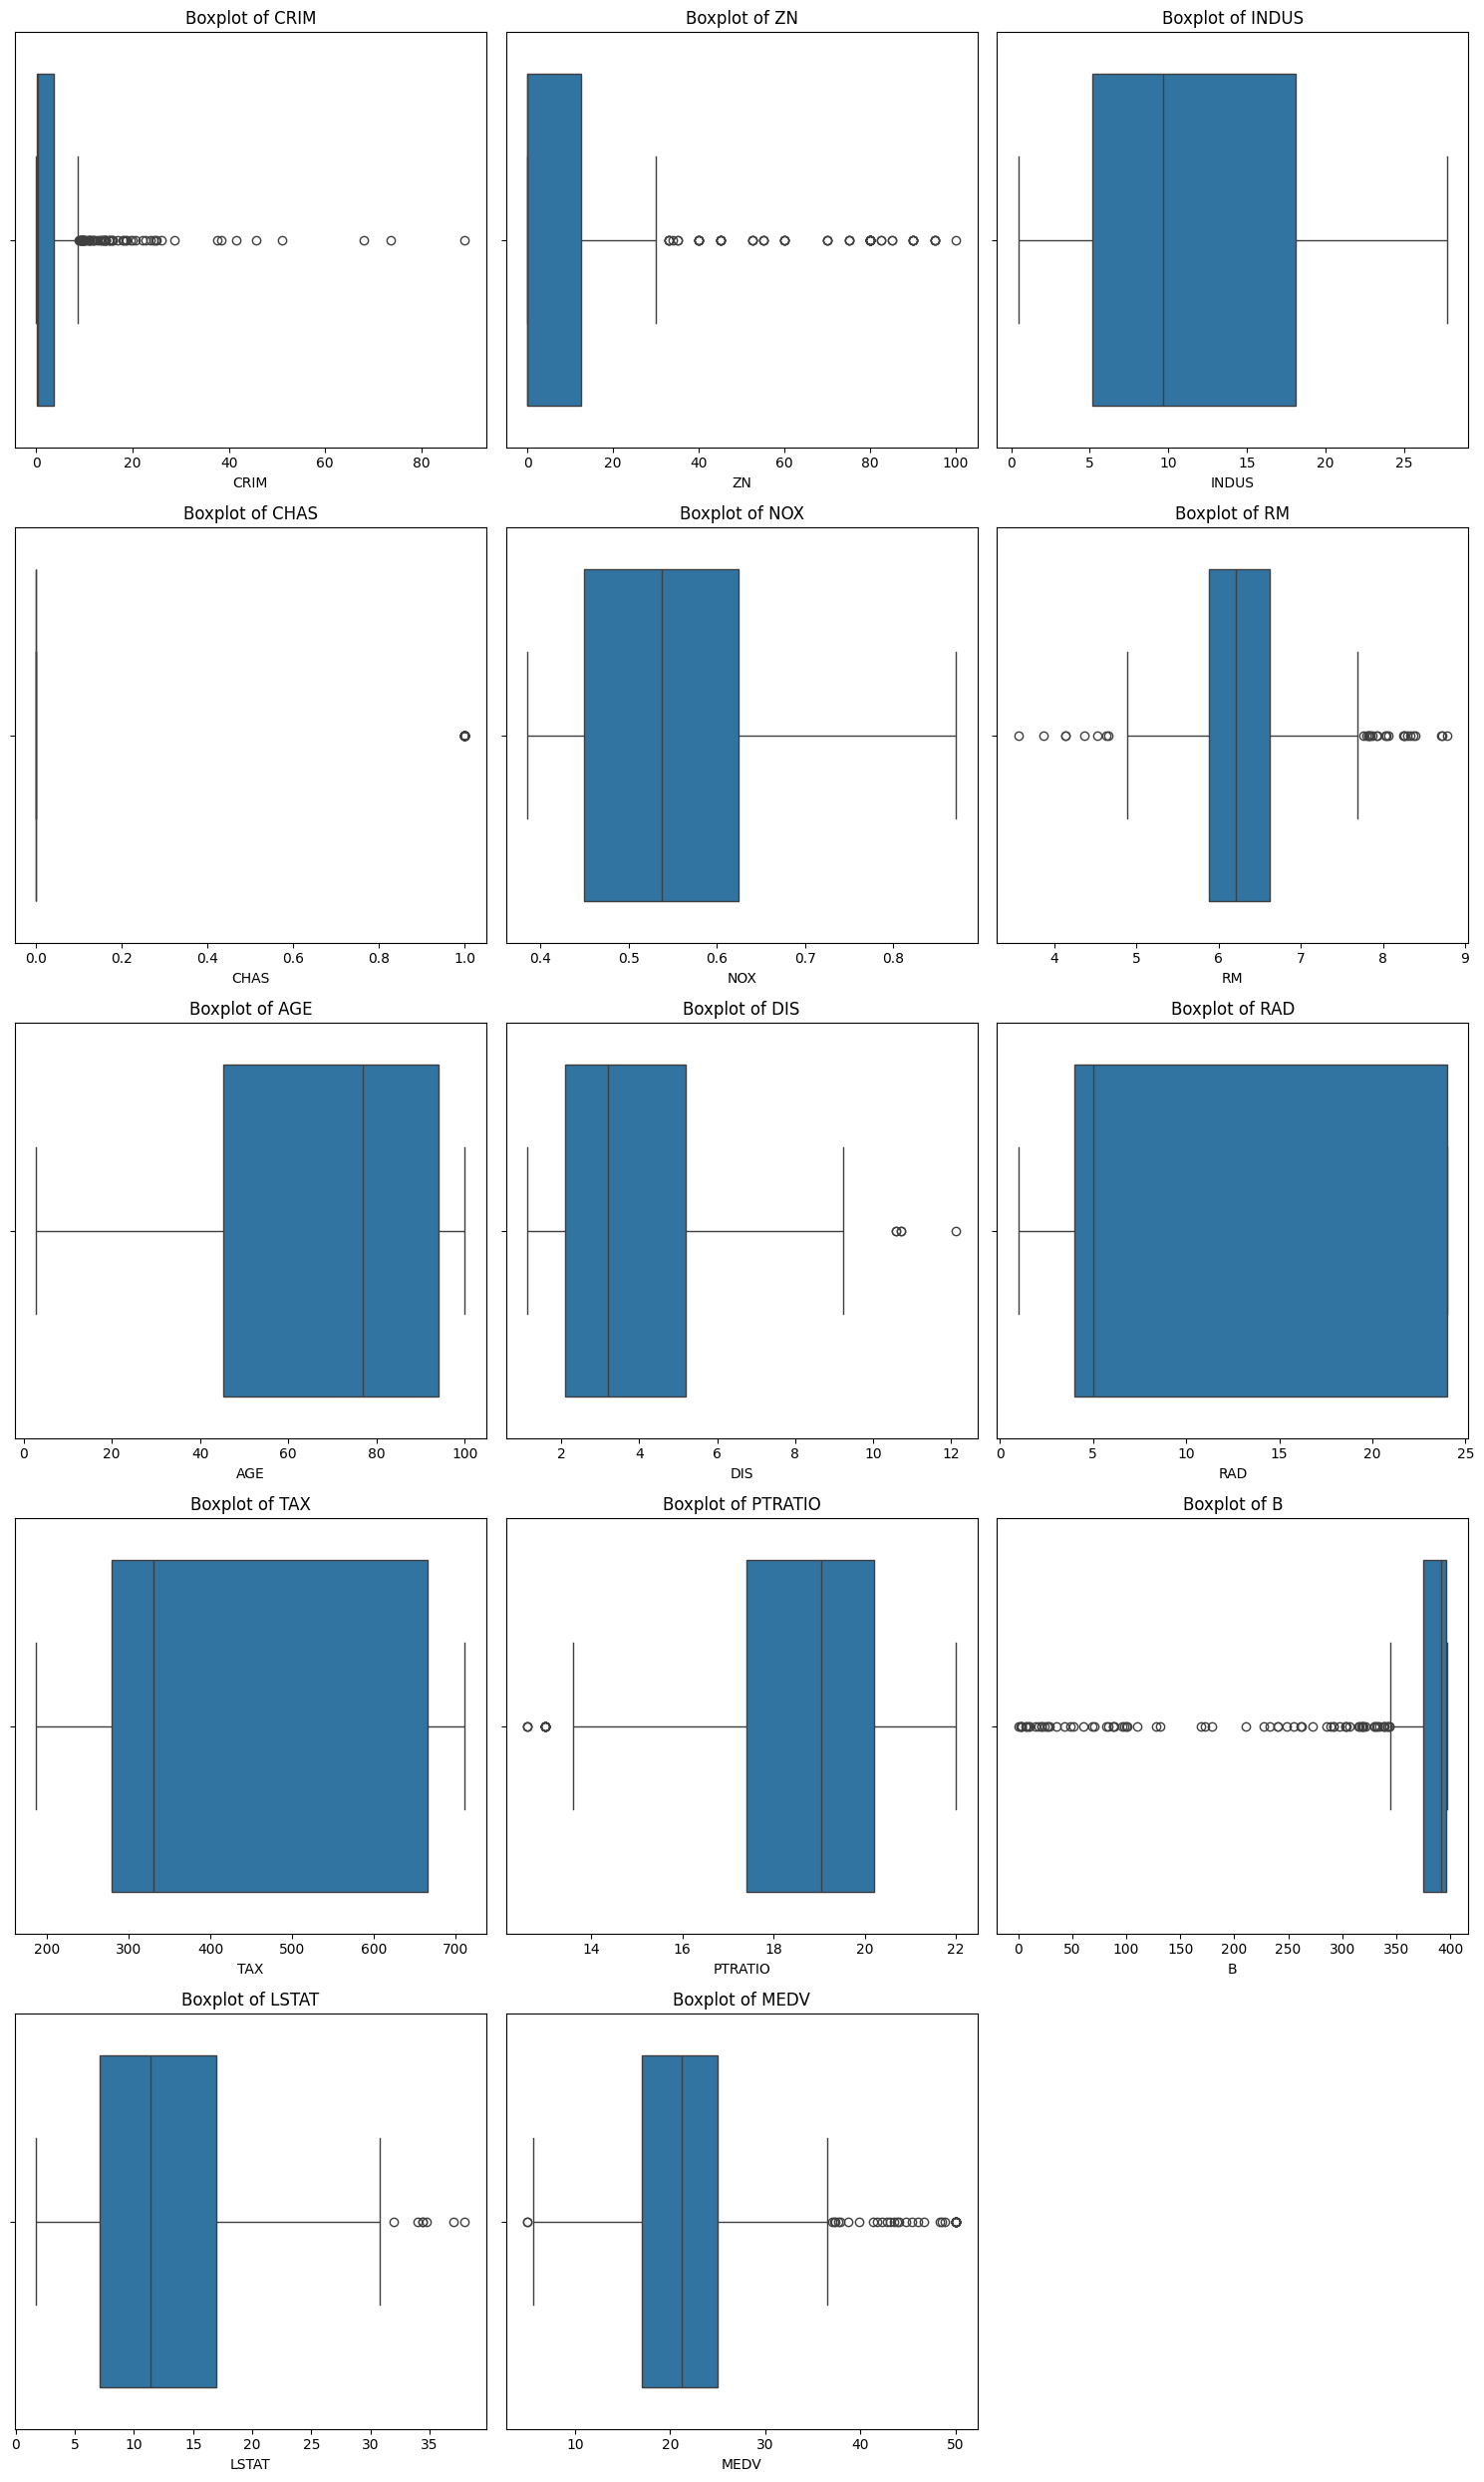

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already defined

# Get all numerical columns
numerical_columns = df.select_dtypes(include='number').columns

# Set up the number of plots per row
n_cols = 3
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols  # Calculate rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot horizontal boxplots for all numerical columns
for i, column in enumerate(numerical_columns):
    sns.boxplot(x=df[column], ax=axes[i])  # Boxplot for horizontal layout
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_xlabel(column)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


## **Performing Imputation for missing data**

In [9]:
# Check the median of the "CRIM" feature
median_crim = df['CRIM'].median()

# Replace NaN values in "CRIM" with the median
df['CRIM'].fillna(median_crim, inplace=True)

In [10]:
# Check the mode of the "ZN" feature
mode_zn = df['ZN'].mode()[0]  # mode() returns a Series, take the first value

# Replace NaN values in "ZN" with the mode
df['ZN'].fillna(mode_zn, inplace=True)

In [11]:
# Calculate the mean of the 'INDUS' feature
mean_indus = df['INDUS'].mean()

# Replace NaN values in 'INDUS' with the mean
df['INDUS'].fillna(mean_indus, inplace=True)

In [12]:
# Calculate the mode of the 'CHAS' feature
mode_chas = df['CHAS'].mode()[0]  # mode() returns a Series, take the first value

# Replace NaN values in 'CHAS' with the mode
df['CHAS'].fillna(mode_chas, inplace=True)

In [13]:
# Calculate the mean of the 'AGE' feature
mean_age = df['AGE'].mean()

# Replace NaN values in 'AGE' with the mean
df['AGE'].fillna(mean_age, inplace=True)

In [14]:
# Calculate the median of the 'LSTAT' feature
median_lstat = df['LSTAT'].median()

# Replace NaN values in 'LSTAT' with the median
df['LSTAT'].fillna(median_lstat, inplace=True)

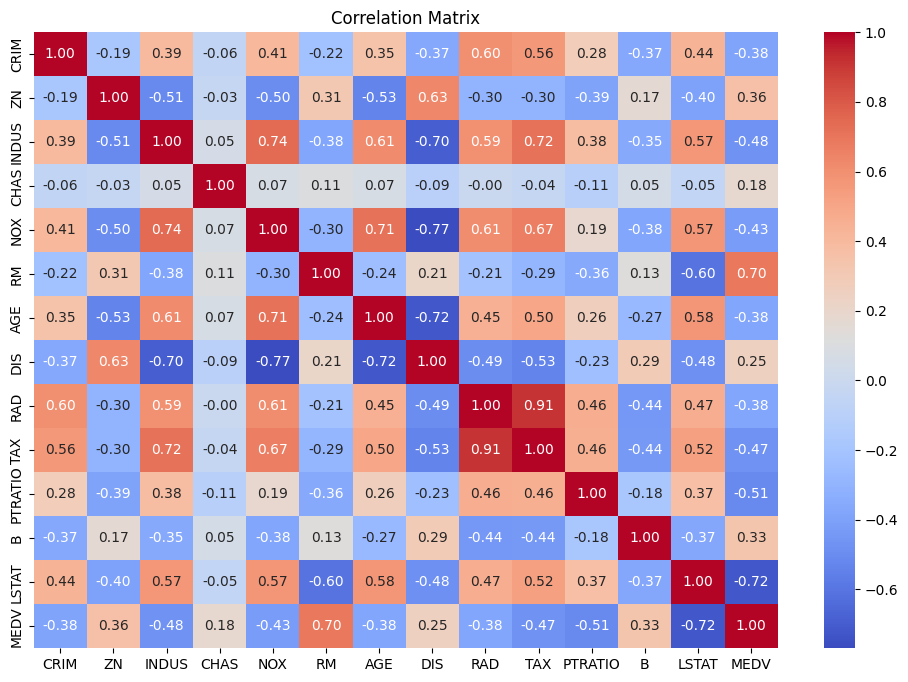

In [15]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

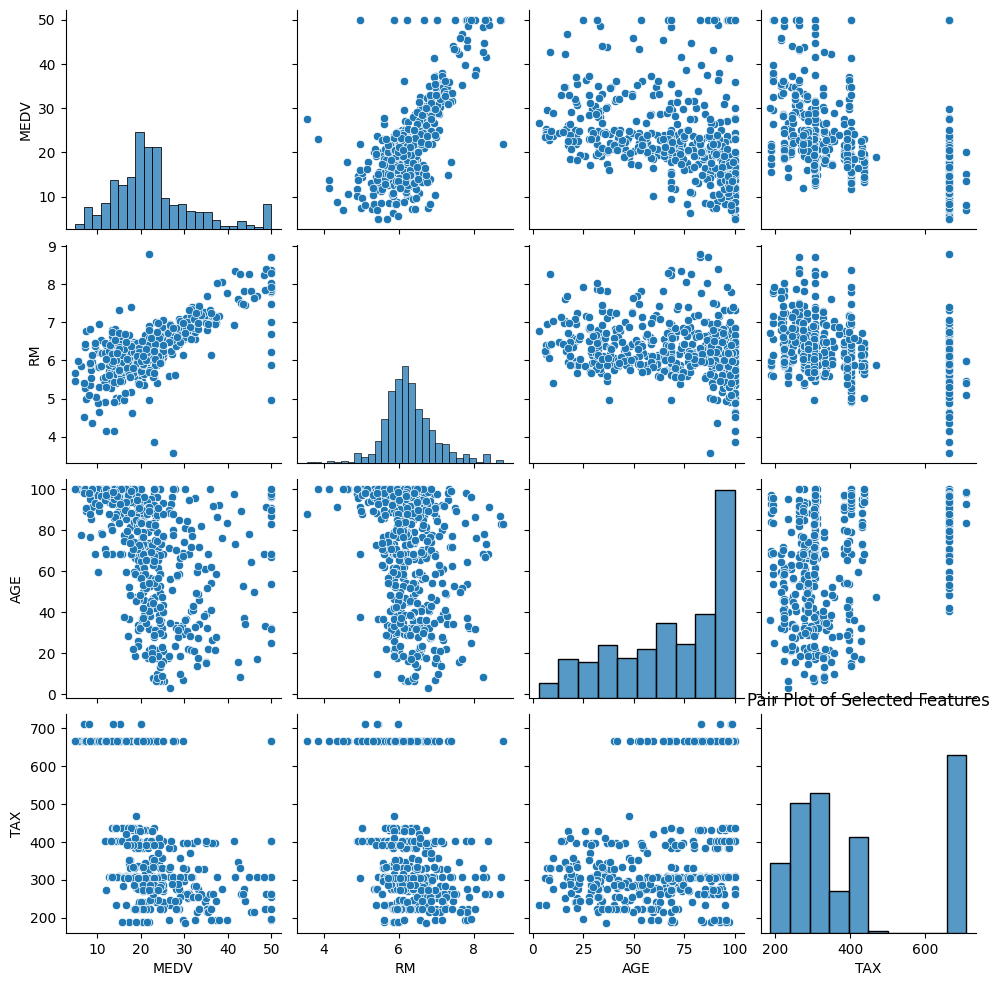

In [16]:
sns.pairplot(df[['MEDV', 'RM', 'AGE', 'TAX']])
plt.title('Pair Plot of Selected Features')
plt.show()

## **Model Building**

### **1. Linear Regression**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error

# Prepare features and target variable
X = df.drop(columns=['MEDV'])
y = df['MEDV']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Store RMSE for different numbers of features
rmse_results = []

# Iterate over a range of features to select
for n_features in range(1, X.shape[1] + 1):
    selector = RFE(model, n_features_to_select=n_features)
    selector = selector.fit(X_train, y_train)

    # Get selected features
    selected_features = X.columns[selector.support_]

    # Fit the model with selected features
    model.fit(X_train[selected_features], y_train)

    # Predict and calculate RMSE
    y_pred = model.predict(X_test[selected_features])
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Store the result
    rmse_results.append((n_features, selected_features.tolist(), rmse))

# Find the best number of features based on RMSE
best_n_features, best_features, best_rmse = min(rmse_results, key=lambda x: x[2])

# Results
print("RMSE for different feature sets:")
for n_features, features, rmse in rmse_results:
    print(f"Number of Features: {n_features}, Features: {features}, RMSE: {rmse:.2f}")

print("\nBest Number of Features:", best_n_features)
print("Best Features:", best_features)
print("Best RMSE:", best_rmse)

RMSE for different feature sets:
Number of Features: 1, Features: ['NOX'], RMSE: 7.63
Number of Features: 2, Features: ['NOX', 'RM'], RMSE: 6.33
Number of Features: 3, Features: ['CHAS', 'NOX', 'RM'], RMSE: 6.29
Number of Features: 4, Features: ['CHAS', 'NOX', 'RM', 'PTRATIO'], RMSE: 5.82
Number of Features: 5, Features: ['CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO'], RMSE: 5.78
Number of Features: 6, Features: ['CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT'], RMSE: 5.01
Number of Features: 7, Features: ['CRIM', 'CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT'], RMSE: 5.12
Number of Features: 8, Features: ['CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT'], RMSE: 5.09
Number of Features: 9, Features: ['CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO', 'LSTAT'], RMSE: 4.99
Number of Features: 10, Features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO', 'LSTAT'], RMSE: 4.91
Number of Features: 11, Features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'R

## **SVR**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Prepare features and target variable
X = df.drop(columns=['MEDV'])
y = df['MEDV']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale all features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an SVR model
model = SVR(kernel='linear')  # You can choose different kernels like 'rbf'

# Store RMSE for different numbers of features
rmse_results = []

# Iterate over a range of features to select
for n_features in range(1, X.shape[1] + 1):
    selector = RFE(model, n_features_to_select=n_features)
    selector = selector.fit(X_train_scaled, y_train)

    # Get selected features
    selected_features = X.columns[selector.support_]

    # Fit the model with selected features
    model.fit(X_train_scaled[:, selector.support_], y_train)

    # Predict and calculate RMSE
    y_pred = model.predict(X_test_scaled[:, selector.support_])
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Store the result
    rmse_results.append((n_features, selected_features.tolist(), rmse))

# Find the best number of features based on RMSE
best_n_features, best_features, best_rmse = min(rmse_results, key=lambda x: x[2])

# Results
print("RMSE for different feature sets:")
for n_features, features, rmse in rmse_results:
    print(f"Number of Features: {n_features}, Features: {features}, RMSE: {rmse:.2f}")

print("\nBest Number of Features:", best_n_features)
print("Best Features:", best_features)
print("Best RMSE:", best_rmse)

RMSE for different feature sets:
Number of Features: 1, Features: ['RM'], RMSE: 6.82
Number of Features: 2, Features: ['RM', 'LSTAT'], RMSE: 5.79
Number of Features: 3, Features: ['RM', 'PTRATIO', 'LSTAT'], RMSE: 5.39
Number of Features: 4, Features: ['NOX', 'RM', 'PTRATIO', 'LSTAT'], RMSE: 5.32
Number of Features: 5, Features: ['NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT'], RMSE: 5.17
Number of Features: 6, Features: ['NOX', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT'], RMSE: 5.39
Number of Features: 7, Features: ['NOX', 'RM', 'AGE', 'DIS', 'PTRATIO', 'B', 'LSTAT'], RMSE: 5.54
Number of Features: 8, Features: ['CRIM', 'NOX', 'RM', 'AGE', 'DIS', 'PTRATIO', 'B', 'LSTAT'], RMSE: 5.61
Number of Features: 9, Features: ['CRIM', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT'], RMSE: 5.63
Number of Features: 10, Features: ['CRIM', 'ZN', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT'], RMSE: 5.52
Number of Features: 11, Features: ['CRIM', 'ZN', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',

## **DTR**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error

# Prepare features and target variable
X = df.drop(columns=['MEDV'])
y = df['MEDV']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Regressor model
model = DecisionTreeRegressor(random_state=42)

# Store RMSE for different numbers of features
rmse_results = []

# Iterate over a range of features to select
for n_features in range(1, X.shape[1] + 1):
    selector = RFE(model, n_features_to_select=n_features)
    selector = selector.fit(X_train, y_train)

    # Get selected features
    selected_features = X.columns[selector.support_]

    # Fit the model with selected features
    model.fit(X_train[selected_features], y_train)

    # Predict and calculate RMSE
    y_pred = model.predict(X_test[selected_features])
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Store the result
    rmse_results.append((n_features, selected_features.tolist(), rmse))

# Find the best number of features based on RMSE
best_n_features, best_features, best_rmse = min(rmse_results, key=lambda x: x[2])

# Results
print("RMSE for different feature sets:")
for n_features, features, rmse in rmse_results:
    print(f"Number of Features: {n_features}, Features: {features}, RMSE: {rmse:.2f}")

print("\nBest Number of Features:", best_n_features)
print("Best Features:", best_features)
print("Best RMSE:", best_rmse)

RMSE for different feature sets:
Number of Features: 1, Features: ['RM'], RMSE: 8.08
Number of Features: 2, Features: ['RM', 'LSTAT'], RMSE: 6.62
Number of Features: 3, Features: ['RM', 'DIS', 'LSTAT'], RMSE: 5.38
Number of Features: 4, Features: ['CRIM', 'RM', 'DIS', 'LSTAT'], RMSE: 5.21
Number of Features: 5, Features: ['CRIM', 'RM', 'DIS', 'PTRATIO', 'LSTAT'], RMSE: 5.30
Number of Features: 6, Features: ['CRIM', 'RM', 'DIS', 'TAX', 'PTRATIO', 'LSTAT'], RMSE: 3.99
Number of Features: 7, Features: ['CRIM', 'NOX', 'RM', 'DIS', 'TAX', 'PTRATIO', 'LSTAT'], RMSE: 5.05
Number of Features: 8, Features: ['CRIM', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT'], RMSE: 4.06
Number of Features: 9, Features: ['CRIM', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT'], RMSE: 3.50
Number of Features: 10, Features: ['CRIM', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'], RMSE: 3.71
Number of Features: 11, Features: ['CRIM', 'ZN', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', '

## **RFC**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error

# Prepare features and target variable
X = df.drop(columns=['MEDV'])
y = df['MEDV']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
model = RandomForestRegressor(random_state=42)

# Store RMSE for different numbers of features
rmse_results = []

# Iterate over a range of features to select
for n_features in range(1, X.shape[1] + 1):
    selector = RFE(model, n_features_to_select=n_features)
    selector = selector.fit(X_train, y_train)

    # Get selected features
    selected_features = X.columns[selector.support_]

    # Fit the model with selected features
    model.fit(X_train[selected_features], y_train)

    # Predict and calculate RMSE
    y_pred = model.predict(X_test[selected_features])
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Store the result
    rmse_results.append((n_features, selected_features.tolist(), rmse))

# Find the best number of features based on RMSE
best_n_features, best_features, best_rmse = min(rmse_results, key=lambda x: x[2])

# Results
print("RMSE for different feature sets:")
for n_features, features, rmse in rmse_results:
    print(f"Number of Features: {n_features}, Features: {features}, RMSE: {rmse:.2f}")

print("\nBest Number of Features:", best_n_features)
print("Best Features:", best_features)
print("Best RMSE:", best_rmse)

RMSE for different feature sets:
Number of Features: 1, Features: ['RM'], RMSE: 7.09
Number of Features: 2, Features: ['RM', 'LSTAT'], RMSE: 4.98
Number of Features: 3, Features: ['RM', 'DIS', 'LSTAT'], RMSE: 3.80
Number of Features: 4, Features: ['CRIM', 'RM', 'DIS', 'LSTAT'], RMSE: 3.30
Number of Features: 5, Features: ['CRIM', 'RM', 'DIS', 'PTRATIO', 'LSTAT'], RMSE: 3.21
Number of Features: 6, Features: ['CRIM', 'NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT'], RMSE: 3.01
Number of Features: 7, Features: ['CRIM', 'NOX', 'RM', 'DIS', 'TAX', 'PTRATIO', 'LSTAT'], RMSE: 2.93
Number of Features: 8, Features: ['CRIM', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'LSTAT'], RMSE: 2.82
Number of Features: 9, Features: ['CRIM', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT'], RMSE: 2.94
Number of Features: 10, Features: ['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT'], RMSE: 2.93
Number of Features: 11, Features: ['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD'

## **Boosting Models**

## **1. Gradient Boosting**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error

# Prepare features and target variable
X = df.drop(columns=['MEDV'])
y = df['MEDV']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Regressor model
model = GradientBoostingRegressor(random_state=42)

# Store RMSE for different numbers of features
rmse_results = []

# Iterate over a range of features to select
for n_features in range(1, X.shape[1] + 1):
    selector = RFE(model, n_features_to_select=n_features)
    selector = selector.fit(X_train, y_train)

    # Get selected features
    selected_features = X.columns[selector.support_]

    # Fit the model with selected features
    model.fit(X_train[selected_features], y_train)

    # Predict and calculate RMSE
    y_pred = model.predict(X_test[selected_features])
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Store the result
    rmse_results.append((n_features, selected_features.tolist(), rmse))

# Find the best number of features based on RMSE
best_n_features, best_features, best_rmse = min(rmse_results, key=lambda x: x[2])

# Results
print("RMSE for different feature sets:")
for n_features, features, rmse in rmse_results:
    print(f"Number of Features: {n_features}, Features: {features}, RMSE: {rmse:.2f}")

print("\nBest Number of Features:", best_n_features)
print("Best Features:", best_features)
print("Best RMSE:", best_rmse)

RMSE for different feature sets:
Number of Features: 1, Features: ['RM'], RMSE: 6.07
Number of Features: 2, Features: ['RM', 'LSTAT'], RMSE: 4.62
Number of Features: 3, Features: ['RM', 'DIS', 'LSTAT'], RMSE: 3.33
Number of Features: 4, Features: ['CRIM', 'RM', 'DIS', 'LSTAT'], RMSE: 3.09
Number of Features: 5, Features: ['CRIM', 'NOX', 'RM', 'DIS', 'LSTAT'], RMSE: 2.81
Number of Features: 6, Features: ['CRIM', 'NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT'], RMSE: 2.73
Number of Features: 7, Features: ['CRIM', 'NOX', 'RM', 'DIS', 'TAX', 'PTRATIO', 'LSTAT'], RMSE: 2.82
Number of Features: 8, Features: ['CRIM', 'NOX', 'RM', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT'], RMSE: 2.76
Number of Features: 9, Features: ['CRIM', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT'], RMSE: 2.76
Number of Features: 10, Features: ['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT'], RMSE: 2.79
Number of Features: 11, Features: ['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX

## **2. Ada Boost**

In [ ]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.200000,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900000,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.100000,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.800000,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200000,6.0622,3,222,18.7,396.90,11.43,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.100000,2.4786,1,273,21.0,391.99,11.43,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.700000,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300000,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Prepare features and target variable
X = df.drop(columns=['MEDV'])
y = df['MEDV']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale all features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# After fitting the scaler in your training code
joblib.dump(scaler, 'scaler.joblib')

X_test_scaled = scaler.transform(X_test)

# Create an AdaBoost Regressor model
base_model = DecisionTreeRegressor()  # Base estimator for AdaBoost
model = AdaBoostRegressor(estimator=base_model, random_state=42)

# Store RMSE for different numbers of features
rmse_results = []

# Iterate over a range of features to select
for n_features in range(1, X.shape[1] + 1):
    selector = RFE(model, n_features_to_select=n_features)
    selector = selector.fit(X_train_scaled, y_train)

    # Get selected features
    selected_features = X.columns[selector.support_]

    # Fit the model with selected features
    model.fit(X_train_scaled[:, selector.support_], y_train)

    # Predict and calculate RMSE
    y_pred = model.predict(X_test_scaled[:, selector.support_])
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Store the result
    rmse_results.append((n_features, selected_features.tolist(), rmse))

# Find the best number of features based on RMSE
best_n_features, best_features, best_rmse = min(rmse_results, key=lambda x: x[2])

# Results
print("RMSE for different feature sets:")
for n_features, features, rmse in rmse_results:
    print(f"Number of Features: {n_features}, Features: {features}, RMSE: {rmse:.2f}")

print("\nBest Number of Features:", best_n_features)
print("Best Features:", best_features)
print("Best RMSE:", best_rmse)

RMSE for different feature sets:
Number of Features: 1, Features: ['LSTAT'], RMSE: 5.75
Number of Features: 2, Features: ['RM', 'LSTAT'], RMSE: 4.97
Number of Features: 3, Features: ['RM', 'DIS', 'LSTAT'], RMSE: 3.42
Number of Features: 4, Features: ['CRIM', 'RM', 'DIS', 'LSTAT'], RMSE: 2.79
Number of Features: 5, Features: ['CRIM', 'NOX', 'RM', 'DIS', 'LSTAT'], RMSE: 2.39
Number of Features: 6, Features: ['CRIM', 'NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT'], RMSE: 2.50
Number of Features: 7, Features: ['CRIM', 'NOX', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT'], RMSE: 2.31
Number of Features: 8, Features: ['CRIM', 'NOX', 'RM', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT'], RMSE: 2.55
Number of Features: 9, Features: ['CRIM', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT'], RMSE: 2.26
Number of Features: 10, Features: ['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT'], RMSE: 2.48
Number of Features: 11, Features: ['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TA

## **Training the model with best features and saving it**

In [ ]:
model = AdaBoostRegressor(estimator=base_model, random_state=42)
best_features = ['CRIM', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']

x = X[best_features]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'RMSE: {rmse:.2f}')

RMSE: 2.26


In [ ]:
# Save the scaler and the model
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(model, 'adaboost_model.pkl')

['adaboost_model.pkl']

## **XGBoost**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error

# Prepare features and target variable
X = df.drop(columns=['MEDV'])
y = df['MEDV']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost Regressor model
model = XGBRegressor(random_state=42)

# Store RMSE for different numbers of features
rmse_results = []

# Iterate over a range of features to select
for n_features in range(1, X.shape[1] + 1):
    selector = RFE(model, n_features_to_select=n_features)
    selector = selector.fit(X_train, y_train)

    # Get selected features
    selected_features = X.columns[selector.support_]

    # Fit the model with selected features
    model.fit(X_train[selected_features], y_train)

    # Predict and calculate RMSE
    y_pred = model.predict(X_test[selected_features])
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Store the result
    rmse_results.append((n_features, selected_features.tolist(), rmse))

# Find the best number of features based on RMSE
best_n_features, best_features, best_rmse = min(rmse_results, key=lambda x: x[2])

# Results
print("RMSE for different feature sets:")
for n_features, features, rmse in rmse_results:
    print(f"Number of Features: {n_features}, Features: {features}, RMSE: {rmse:.2f}")

print("\nBest Number of Features:", best_n_features)
print("Best Features:", best_features)
print("Best RMSE:", best_rmse)

RMSE for different feature sets:
Number of Features: 1, Features: ['RM'], RMSE: 7.39
Number of Features: 2, Features: ['RM', 'LSTAT'], RMSE: 5.23
Number of Features: 3, Features: ['NOX', 'RM', 'LSTAT'], RMSE: 3.13
Number of Features: 4, Features: ['NOX', 'RM', 'PTRATIO', 'LSTAT'], RMSE: 3.38
Number of Features: 5, Features: ['NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT'], RMSE: 2.79
Number of Features: 6, Features: ['NOX', 'RM', 'DIS', 'TAX', 'PTRATIO', 'LSTAT'], RMSE: 2.76
Number of Features: 7, Features: ['CRIM', 'NOX', 'RM', 'DIS', 'TAX', 'PTRATIO', 'LSTAT'], RMSE: 2.49
Number of Features: 8, Features: ['CRIM', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'LSTAT'], RMSE: 2.59
Number of Features: 9, Features: ['CRIM', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT'], RMSE: 2.62
Number of Features: 10, Features: ['CRIM', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'], RMSE: 2.42
Number of Features: 11, Features: ['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD

## **LightGBM**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error

# Prepare features and target variable
X = df.drop(columns=['MEDV'])
y = df['MEDV']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an LGBM Regressor model
model = LGBMRegressor(random_state=42)

# Store RMSE for different numbers of features
rmse_results = []

# Iterate over a range of features to select
for n_features in range(1, X.shape[1] + 1):
    selector = RFE(model, n_features_to_select=n_features)
    selector = selector.fit(X_train, y_train)

    # Get selected features
    selected_features = X.columns[selector.support_]

    # Fit the model with selected features
    model.fit(X_train[selected_features], y_train)

    # Predict and calculate RMSE
    y_pred = model.predict(X_test[selected_features])
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Store the result
    rmse_results.append((n_features, selected_features.tolist(), rmse))

# Find the best number of features based on RMSE
best_n_features, best_features, best_rmse = min(rmse_results, key=lambda x: x[2])

# Results
print("RMSE for different feature sets:")
for n_features, features, rmse in rmse_results:
    print(f"Number of Features: {n_features}, Features: {features}, RMSE: {rmse:.2f}")

print("\nBest Number of Features:", best_n_features)
print("Best Features:", best_features)
print("Best RMSE:", best_rmse)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

## **CatBoost**

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error

# Prepare features and target variable
X = df.drop(columns=['MEDV'])
y = df['MEDV']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a CatBoost Regressor model
model = CatBoostRegressor(random_state=42, silent=True)

# Store RMSE for different numbers of features
rmse_results = []

# Iterate over a range of features to select
for n_features in range(1, X.shape[1] + 1):
    selector = RFE(model, n_features_to_select=n_features)
    selector = selector.fit(X_train, y_train)

    # Get selected features
    selected_features = X.columns[selector.support_]

    # Fit the model with selected features
    model.fit(X_train[selected_features], y_train)

    # Predict and calculate RMSE
    y_pred = model.predict(X_test[selected_features])
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Store the result
    rmse_results.append((n_features, selected_features.tolist(), rmse))

# Find the best number of features based on RMSE
best_n_features, best_features, best_rmse = min(rmse_results, key=lambda x: x[2])

# Results
print("RMSE for different feature sets:")
for n_features, features, rmse in rmse_results:
    print(f"Number of Features: {n_features}, Features: {features}, RMSE: {rmse:.2f}")

print("\nBest Number of Features:", best_n_features)
print("Best Features:", best_features)
print("Best RMSE:", best_rmse)

RMSE for different feature sets:
Number of Features: 1, Features: ['RM'], RMSE: 6.30
Number of Features: 2, Features: ['RM', 'LSTAT'], RMSE: 4.65
Number of Features: 3, Features: ['NOX', 'RM', 'LSTAT'], RMSE: 3.35
Number of Features: 4, Features: ['NOX', 'RM', 'DIS', 'LSTAT'], RMSE: 2.90
Number of Features: 5, Features: ['CRIM', 'NOX', 'RM', 'DIS', 'LSTAT'], RMSE: 2.74
Number of Features: 6, Features: ['CRIM', 'NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT'], RMSE: 2.87
Number of Features: 7, Features: ['CRIM', 'NOX', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT'], RMSE: 2.76
Number of Features: 8, Features: ['CRIM', 'NOX', 'RM', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT'], RMSE: 2.85
Number of Features: 9, Features: ['CRIM', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT'], RMSE: 2.73
Number of Features: 10, Features: ['CRIM', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'], RMSE: 2.70
Number of Features: 11, Features: ['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'P

## **Neural Network**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Prepare features and target variable
X = df.drop(columns=['MEDV'])
y = df['MEDV']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale all features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1)

# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'RMSE: {rmse:.2f}')

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 619.8870
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 574.0466  
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 541.5562 
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 460.1719 
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 401.0648 
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 283.7728 
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 189.9108 
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 111.0192
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 66.8291 
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 43.0366 
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 38.4828 
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29.2737 
Epoch 13/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30.2365 
Epoch 14/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25.8602 
Epoch 15/100
13/13 ━━━━━━━━━━━━━━━━━